## Depression prediction: 
In this project, I explored depression, a critical public health issue, by analysing the Behavioral Risk Factor Surveillance System (BRFSS) data. My objectives was to identify key risk factors associated with depression, investigate state variations in depression prevalence, and develop a predictive model for depression likelihood based on various risk factors.

Key Questions. 
1. Risk Factors: Identify the key risk factors associated with depression. This may include other chronic conditions, lifestyle factors (like diet and exercise), and demographic variables.

2. State Variations: Investigate if there are significant differences in the prevalence or risk factors of depression among the 10 states in the dataset.

3. Predictive Modeling: Develop a model to predict the likelihood of depression based on various risk factors.



### Loading Relevant libraries

In [1]:
#Loading and inspecting the dataset.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import sys
!{sys.executable} -m pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

### Data Preperation
The first step in the analysis involved loading and preparing the BRFSS dataset for exploration and modeling. This includes loading the dataset, examining the first few rows for an initial understanding, identifying the data types of various columns, and summarizing the dataset to gain a basic overview

In [2]:
#Loading the dataset
data = pd.read_csv('brfss_10states.csv')
data.head()

,X_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,X_PSU,CTELENUM,...,X_PAREC1,X_PASTAE1,X_LMTACT1,X_LMTWRK1,X_LMTSCL1,X_RFSEAT2,X_RFSEAT3,X_FLSHOT6,X_PNEUMO2,X_AIDTST3
0,1,1,b'01292015',b'01',b'29',b'2015',1200,2015000001,2015000001,1.0,...,4,2,1.0,1.0,1.0,1,1,NaN,NaN,1.0
1,1,1,b'01202015',b'01',b'20',b'2015',1100,2015000002,2015000002,1.0,...,2,2,3.0,3.0,4.0,2,2,NaN,NaN,2.0
2,1,1,b'02012015',b'02',b'01',b'2015',1200,2015000003,2015000003,1.0,...,9,9,9.0,9.0,9.0,9,9,9.0,9.0,NaN
3,1,1,b'01142015',b'01',b'14',b'2015',1100,2015000004,2015000004,1.0,...,4,2,1.0,1.0,1.0,1,1,NaN,NaN,9.0
4,1,1,b'01142015',b'01',b'14',b'2015',1100,2015000005,2015000005,1.0,...,4,2,1.0,1.0,1.0,1,1,NaN,NaN,1.0


In [3]:
#Identifying the shape of the data
data.shape

(80649, 330)

I then selected my variable of choice.

In [4]:
# Columns specified for the analysis
selected_columns = [
    "X_STATE", "X_MICHD", "DIABETE3", "X_LTASTH1", "X_DRDXAR1", "CHCOCNCR", "ADDEPEV2",  # health conditions
    "X_RFHYPE5", "X_RFCHOL",  # high blood pressure, high cholesterol
    "X_BMI5", "SMOKE100", "CVDSTRK3",  # BMI, smoking, stroke
    "X_TOTINDA",   # physical activity
    "X_FRTLT1", "X_FRUTSUM", "X_VEGLT1", "X_VEGESUM",  # diet
    "X_RFDRHV5", "X_DRNKWEK",  # drinking
    "DIFFWALK", "HLTHPLN1", "MEDCOST", "GENHLTH", "MENTHLTH",'PHYSHLTH',  # health care and general health
    "SEX", "X_AGEG5YR", "X_AGE65YR", "EDUCA", "INCOME2"  # demographics
]

# Select the specified columns from the dataset
brfss_data = data[selected_columns]

# Display the first few rows of the selected data
brfss_data.head()

,X_STATE,X_MICHD,DIABETE3,X_LTASTH1,X_DRDXAR1,CHCOCNCR,ADDEPEV2,X_RFHYPE5,X_RFCHOL,X_BMI5,...,HLTHPLN1,MEDCOST,GENHLTH,MENTHLTH,PHYSHLTH,SEX,X_AGEG5YR,X_AGE65YR,EDUCA,INCOME2
0,1,2.0,3.0,2,1.0,2,1,2,2.0,4018.0,...,1,2,5.0,18,15,2,9,1,4,3.0
1,1,2.0,3.0,1,2.0,2,2,1,1.0,2509.0,...,2,1,3.0,88,88,2,7,1,6,1.0
2,1,NaN,3.0,1,1.0,1,2,1,2.0,2204.0,...,1,2,4.0,88,15,2,11,2,4,99.0
3,1,2.0,3.0,1,1.0,1,1,2,2.0,2819.0,...,1,1,5.0,30,30,2,9,1,4,8.0
4,1,2.0,3.0,1,1.0,2,2,1,1.0,2437.0,...,1,2,5.0,88,20,2,9,1,5,77.0


### Renaming Columns

To better understand my variables, I renamed them into Variable names that are easy to understand

In [5]:
# Renaming columns for better readability
# Renaming the columns with more descriptive names
renamed_columns = {
    "X_STATE": "State", 
    "X_MICHD": "HeartDisease", 
    "DIABETE3": "Diabetes", 
    "X_LTASTH1": "Asthma", 
    "X_DRDXAR1": "Arthritis", 
    "CHCOCNCR": "Cancer", 
    "ADDEPEV2": "Depression", 
    "X_RFHYPE5": "HighBP",  # High Blood Pressure
    "X_RFCHOL": "HighCholesterol", 
    "X_BMI5": "BMI", 
    "SMOKE100": "Smoking", 
    "CVDSTRK3": "Stroke", 
    "X_TOTINDA": "PhysicalActivity", 
    "X_FRTLT1": "Fruit", 
    "X_FRUTSUM": "TotalFruits", 
    "X_VEGLT1": "Vegetable", 
    "X_VEGESUM": "TotalVegetables", 
    "X_RFDRHV5": "HeavyDrinking", 
    "X_DRNKWEK": "TotalDrinkingPerWeek", 
    "DIFFWALK": "DifficultyWalking", 
    "HLTHPLN1": "HealthCareAccess", 
    "MEDCOST": "HealthCareCost", 
    "GENHLTH": "GeneralHealth", 
    "MENTHLTH": "MentalHealthDays", 
    "PHYSHLTH": "PhysicalHealthDays",
    "SEX": "Gender", 
    "X_AGEG5YR": "AgeGroup", 
    "X_AGE65YR": "Age65OrOlder", 
    "EDUCA": "Education", 
    "INCOME2": "Income"
}

brfss_data_renamed = brfss_data.rename(columns=renamed_columns)

# Display the datatypes of the columns
brfss_data_renamed.head()


,State,HeartDisease,Diabetes,Asthma,Arthritis,Cancer,Depression,HighBP,HighCholesterol,BMI,...,HealthCareAccess,HealthCareCost,GeneralHealth,MentalHealthDays,PhysicalHealthDays,Gender,AgeGroup,Age65OrOlder,Education,Income
0,1,2.0,3.0,2,1.0,2,1,2,2.0,4018.0,...,1,2,5.0,18,15,2,9,1,4,3.0
1,1,2.0,3.0,1,2.0,2,2,1,1.0,2509.0,...,2,1,3.0,88,88,2,7,1,6,1.0
2,1,NaN,3.0,1,1.0,1,2,1,2.0,2204.0,...,1,2,4.0,88,15,2,11,2,4,99.0
3,1,2.0,3.0,1,1.0,1,1,2,2.0,2819.0,...,1,1,5.0,30,30,2,9,1,4,8.0
4,1,2.0,3.0,1,1.0,2,2,1,1.0,2437.0,...,1,2,5.0,88,20,2,9,1,5,77.0


In [6]:
#Viewing the columns I have in the dataset
brfss_data_renamed.columns[0: ]

Index(['State', 'HeartDisease', 'Diabetes', 'Asthma', 'Arthritis', 'Cancer',
       'Depression', 'HighBP', 'HighCholesterol', 'BMI', 'Smoking', 'Stroke',
       'PhysicalActivity', 'Fruit', 'TotalFruits', 'Vegetable',
       'TotalVegetables', 'HeavyDrinking', 'TotalDrinkingPerWeek',
       'DifficultyWalking', 'HealthCareAccess', 'HealthCareCost',
       'GeneralHealth', 'MentalHealthDays', 'PhysicalHealthDays', 'Gender',
       'AgeGroup', 'Age65OrOlder', 'Education', 'Income'],
      dtype='object')

## Identifying Null Values
A crucial step in data preparation was identifying and handling null values. Null values can significantly affect the integrity and validity of my analysis, especially in a dataset as complex as the BRFSS. My approach to handling these null values is tailored to maintain the dataset's robustness.

In [7]:
# Checking for missing values in the dataset
missing_values = brfss_data_renamed.isnull().sum()

# Display columns with missing values and the count of missing data
missing_values[missing_values > 0]



HeartDisease           752
Diabetes                 1
Arthritis              559
HighCholesterol      10548
BMI                   6997
Smoking               3224
TotalFruits           9468
TotalVegetables      10925
DifficultyWalking     2672
GeneralHealth            1
Income                 797
dtype: int64

Above is a list of columns with null values, I viewed them in terms of row percentsge

In [8]:
# Checking the percentage of missing values in each column
missing_values_percent = brfss_data_renamed.isnull().mean() * 100
missing_values_percent.sort_values(ascending=False).head(20) # Display top 20 columns with highest missing values


TotalVegetables       13.546355
HighCholesterol       13.078897
TotalFruits           11.739761
BMI                    8.675867
Smoking                3.997570
DifficultyWalking      3.313122
Income                 0.988233
HeartDisease           0.932436
Arthritis              0.693127
GeneralHealth          0.001240
Diabetes               0.001240
Gender                 0.000000
AgeGroup               0.000000
Age65OrOlder           0.000000
PhysicalHealthDays     0.000000
MentalHealthDays       0.000000
Education              0.000000
HealthCareCost         0.000000
HealthCareAccess       0.000000
State                  0.000000
dtype: float64

### Handling NAs
After evaluating the extent of missing data, I dropped all rows with null values to ensure the quality of my dataset. This approach simplifies the dataset while potentially impacting the sample size and representation.

In [9]:
#Dropping all NAs in the dataset
brfss_data_renamed = brfss_data_renamed.dropna()

# Checking for missing values 
imputed_missing_values = brfss_data_renamed.isnull().sum()
imputed_missing_values_percentage = (imputed_missing_values / len(brfss_data_renamed)) * 100

# Displaying the number and percentage of missing values to confirm
imputed_missing_data_summary = pd.DataFrame({'Missing Values After Imputation': imputed_missing_values, 'Percentage (%)': imputed_missing_values_percentage})
imputed_missing_data_summary.sort_values(by='Missing Values After Imputation', ascending=False)


,Missing Values After Imputation,Percentage (%)
State,0,0.0
HeartDisease,0,0.0
Education,0,0.0
Age65OrOlder,0,0.0
AgeGroup,0,0.0
Gender,0,0.0
PhysicalHealthDays,0,0.0
MentalHealthDays,0,0.0
GeneralHealth,0,0.0
HealthCareCost,0,0.0


In [10]:
#Identify how many variables after dropping the NAs
brfss_data_renamed.shape

(55773, 30)

### Dealing with Variables Types. 
Firstly, I sought to understand the type of variables I was  dealing with. Most of the recorded responses were categorical variables, but still, there were dummy variables that signified lack of response or no response at all. I first ran the following code to unravel such cases. 

I also aimed at replacing all Yes and No into 1 and 0, instead of 2 and 1 for all binary responses. 

In [11]:
#Understanding the different types of responses in each variable to remove dummy variables and assign the right variabl
for col in brfss_data_renamed.columns:
    print('--------------------------------------------')
    unique_vals = brfss_data_renamed[col].unique()
    print(f'{col}:')
    print(f'{unique_vals}')
    print(f'Total Values: {len(unique_vals)}')

--------------------------------------------
State:
[ 1  2  4  5  6  8  9 10 11 12]
Total Values: 10
--------------------------------------------
HeartDisease:
[2. 1.]
Total Values: 2
--------------------------------------------
Diabetes:
[3. 1. 4. 2. 7. 9.]
Total Values: 6
--------------------------------------------
Asthma:
[2 1 9]
Total Values: 3
--------------------------------------------
Arthritis:
[1. 2.]
Total Values: 2
--------------------------------------------
Cancer:
[2 1 7 9]
Total Values: 4
--------------------------------------------
Depression:
[1 2 9 7]
Total Values: 4
--------------------------------------------
HighBP:
[2 1 9]
Total Values: 3
--------------------------------------------
HighCholesterol:
[2. 1. 9.]
Total Values: 3
--------------------------------------------
BMI:
[4018. 2509. 2819. ... 4525. 4091. 3272.]
Total Values: 2391
--------------------------------------------
Smoking:
[1. 2. 7. 9.]
Total Values: 4
--------------------------------------------


The next part involve further look into the variables. I set the responses to 1 or 0 to represent the presence or absence of a condition. This simplified the analysis and made the data more conducive for statistical modeling.

As part of the data preparation, I also removed dummy variables to avoid multicollinearity in the models. This, if not addressed, can distort the results and make them difficult to interpret, so eliminating these dummy variables is crucial for a more accurate and reliable analysis

In [12]:
#"Income",  
#Variable type: Category 
brfss_data_renamed = brfss_data_renamed[brfss_data_renamed.Income != 99]
brfss_data_renamed = brfss_data_renamed[brfss_data_renamed.Income != 77]

#Education
#1 Did not graduate High School Respondents who reported they did not graduate high school. 
# 2  Graduated High School Respondents who reported they graduated high school.
# 3  Attended College or Technical School Respondents who reported they attended college or technical school.
# 4  Graduated from College or Technical School Respondents who reported they graduated from college or technical school. 
#9  Don’t know/ Not sure/ Missing Respondents who reported they didn´t know, were not sure, refused, or had a missing value for EDUCA. (EDUCA=9, missing) 
brfss_data_renamed = brfss_data_renamed[brfss_data_renamed.Education != 9]
brfss_data_renamed.Education.unique()


#"Gender",  
#1  Male  2  Female   
#Variable type: Category 
brfss_data_renamed['Gender'] = brfss_data_renamed['Gender'].replace({2:0})
brfss_data_renamed = brfss_data_renamed[brfss_data_renamed.Gender != 9]
brfss_data_renamed = brfss_data_renamed[brfss_data_renamed.Gender != 7]
brfss_data_renamed.Gender.unique()

#"GeneralHealth",  
#1  Yes  2  No  7  Don’t know / Not sure  9  Refused   
#Variable type: Category 
#brfss_data_renamed['HealthCareCost'] = brfss_data_renamed['HealthCareCost'].replace({2:0})
brfss_data_renamed = brfss_data_renamed[brfss_data_renamed.GeneralHealth != 9]
brfss_data_renamed = brfss_data_renamed[brfss_data_renamed.GeneralHealth != 7]
brfss_data_renamed.GeneralHealth.unique()

#"HealthCareCost",  
#1  Yes  2  No  7  Don’t know / Not sure  9  Refused   
#Variable type: Category 
brfss_data_renamed['HealthCareCost'] = brfss_data_renamed['HealthCareCost'].replace({2:0})
brfss_data_renamed = brfss_data_renamed[brfss_data_renamed.HealthCareCost != 9]
brfss_data_renamed = brfss_data_renamed[brfss_data_renamed.HealthCareCost != 7]
brfss_data_renamed.HealthCareCost.unique()

#"HealthCareAccess",  
#1  Yes  2  No  7  Don’t know / Not sure  9  Refused   
#Variable type: Category 
brfss_data_renamed['HealthCareAccess'] = brfss_data_renamed['HealthCareAccess'].replace({2:0})
brfss_data_renamed = brfss_data_renamed[brfss_data_renamed.HealthCareAccess != 9]
brfss_data_renamed = brfss_data_renamed[brfss_data_renamed.HealthCareAccess != 7]
brfss_data_renamed.HealthCareAccess.unique()


#"DifficultyWalking",  
#1  Yes  2  No  7  Don’t know / Not sure  9  Refused   
#Variable type: Category 
brfss_data_renamed['DifficultyWalking'] = brfss_data_renamed['DifficultyWalking'].replace({2:0})
brfss_data_renamed = brfss_data_renamed[brfss_data_renamed.DifficultyWalking != 9]
brfss_data_renamed = brfss_data_renamed[brfss_data_renamed.DifficultyWalking != 7]
brfss_data_renamed.DifficultyWalking.unique()

#"Vegetable",  
#1  Yes  2  No  7  Don’t know / Not sure  9  Refused   
#Variable type: Category 
brfss_data_renamed['HeavyDrinking'] = brfss_data_renamed['HeavyDrinking'].replace({2:0})
brfss_data_renamed = brfss_data_renamed[brfss_data_renamed.HeavyDrinking != 9]
brfss_data_renamed = brfss_data_renamed[brfss_data_renamed.HeavyDrinking != 7]
brfss_data_renamed.HeavyDrinking.unique()

#"Vegetable",  
#1  Yes  2  No  7  Don’t know / Not sure  9  Refused   
#Variable type: Category 
brfss_data_renamed['Vegetable'] = brfss_data_renamed['Vegetable'].replace({2:0})
brfss_data_renamed = brfss_data_renamed[brfss_data_renamed.Vegetable != 9]
brfss_data_renamed = brfss_data_renamed[brfss_data_renamed.Vegetable != 7]
brfss_data_renamed.Vegetable.unique()

#"Fruit",  
#1  Yes  2  No  7  Don’t know / Not sure  9  Refused   
#Variable type: Category 
brfss_data_renamed['Fruit'] = brfss_data_renamed['Fruit'].replace({2:0})
brfss_data_renamed = brfss_data_renamed[brfss_data_renamed.Fruit != 9]
brfss_data_renamed = brfss_data_renamed[brfss_data_renamed.Fruit != 7]
brfss_data_renamed.Fruit.unique()

#"PhysicalActivity",  
#1  Yes  2  No  7  Don’t know / Not sure  9  Refused   
#Variable type: Category 
brfss_data_renamed['PhysicalActivity'] = brfss_data_renamed['PhysicalActivity'].replace({2:0})
brfss_data_renamed = brfss_data_renamed[brfss_data_renamed.PhysicalActivity != 9]
brfss_data_renamed = brfss_data_renamed[brfss_data_renamed.PhysicalActivity != 7]
brfss_data_renamed.PhysicalActivity.unique()

#"Stroke",  
#1  Yes  2  No  7  Don’t know / Not sure  9  Refused   
#Variable type: Category 
brfss_data_renamed['Stroke'] = brfss_data_renamed['Stroke'].replace({2:0})
brfss_data_renamed = brfss_data_renamed[brfss_data_renamed.Stroke != 9]
brfss_data_renamed = brfss_data_renamed[brfss_data_renamed.Stroke != 7]
brfss_data_renamed.Stroke.unique()


#"Smoking",  
#1  Yes  2  No  7  Don’t know / Not sure  9  Refused   
#Variable type: Category 
brfss_data_renamed['Smoking'] = brfss_data_renamed['Smoking'].replace({2:0})
brfss_data_renamed = brfss_data_renamed[brfss_data_renamed.Smoking != 9]
brfss_data_renamed = brfss_data_renamed[brfss_data_renamed.Smoking != 7]
brfss_data_renamed.Smoking.unique()


#"HighCholesterol",  
#1  Yes  2  No  7  Don’t know / Not sure  9  Refused   
#Variable type: Category 
brfss_data_renamed['HighCholesterol'] = brfss_data_renamed['HighCholesterol'].replace({2:0})
brfss_data_renamed = brfss_data_renamed[brfss_data_renamed.HighCholesterol != 9]
brfss_data_renamed = brfss_data_renamed[brfss_data_renamed.HighCholesterol != 7]
#brfss_data_renamed['HighCholesterol'] = brfss_data_renamed['HighCholesterol'].astype('category')
brfss_data_renamed.HighCholesterol.unique()

#"Depression",  
#1  Yes  2  No  7  Don’t know / Not sure  9  Refused   
#Variable type: Category 
brfss_data_renamed['Depression'] = brfss_data_renamed['Depression'].replace({2:0})
brfss_data_renamed = brfss_data_renamed[brfss_data_renamed.Depression != 9]
brfss_data_renamed = brfss_data_renamed[brfss_data_renamed.Depression != 7]
brfss_data_renamed.Depression.unique()

#"Cancer",  
#1  Yes  2  No  7  Don’t know / Not sure  9  Refused   
#Variable type: Category 
brfss_data_renamed['Cancer'] = brfss_data_renamed['Cancer'].replace({2:0})
brfss_data_renamed = brfss_data_renamed[brfss_data_renamed.Cancer != 9]
brfss_data_renamed = brfss_data_renamed[brfss_data_renamed.Cancer != 7]
brfss_data_renamed.Cancer.unique()


#"Arthritis",  
#1  Yes  2  No  7  Don’t know / Not sure  9  Refused   
#Variable type: Category 
brfss_data_renamed['Arthritis'] = brfss_data_renamed['Arthritis'].replace({2:0})
#brfss_data_renamed = brfss_data_renamed[brfss_data_renamed.Asthma != 9]
#brfss_data_renamed = brfss_data_renamed[brfss_data_renamed.Diabetes != 7]
brfss_data_renamed.Asthma.unique()


#    "X_LTASTH1": "Asthma",  
#1  Yes  2  No  7  Don’t know / Not sure  9  Refused   
#Variable type: Category 
brfss_data_renamed['Asthma'] = brfss_data_renamed['Asthma'].replace({2:0})
brfss_data_renamed = brfss_data_renamed[brfss_data_renamed.Asthma != 9]
#brfss_data_renamed = brfss_data_renamed[brfss_data_renamed.Diabetes != 7]
brfss_data_renamed.Asthma.unique()

#"Diabetes",  
#1 Yes   2 Yes, but female told only during pregnancy   3 No   4 No, pre-diabetes or borderline diabetes   7 Don’t know / Not sure   9 Refused  
#Variable type: Category 
#brfss_data_renamed['Diabetes'] = brfss_data_renamed['Diabetes'].replace({2:0, 3:0, 1:2, 4:1})
brfss_data_renamed = brfss_data_renamed[brfss_data_renamed.Diabetes != 9]
brfss_data_renamed = brfss_data_renamed[brfss_data_renamed.Diabetes != 7]
brfss_data_renamed.Diabetes.unique()

#"HighBP",  
#1 and 0
#brfss_data_renamed['Diabetes'] = brfss_data_renamed['Diabetes'].replace({2:0, 3:0, 1:2, 4:1})
brfss_data_renamed = brfss_data_renamed[brfss_data_renamed.HighBP != 9]
brfss_data_renamed['HighBP'] = brfss_data_renamed['HighBP'].replace({2:0})
brfss_data_renamed = brfss_data_renamed[brfss_data_renamed.HighBP != 7]

# "HeartDisease",  

#1  Yes  2  No  7  Don’t know / Not sure  9  Refused   
#Variable type: Category 
#Change 2 to 0 
brfss_data_renamed['HeartDisease'] = brfss_data_renamed['HeartDisease'].replace({2:0})
brfss_data_renamed = brfss_data_renamed[brfss_data_renamed.HeartDisease != 9]
brfss_data_renamed.HeartDisease.unique()


array([0., 1.])

In [13]:
#Confirming the new resonses after dropping dummy variables and changing the binry responses. 
for col in brfss_data_renamed.columns:
    print('--------------------------------------------')
    unique_vals = brfss_data_renamed[col].unique()
    print(f'{col}:')
    print(f'{unique_vals}')
    print(f'Total Values: {len(unique_vals)}')

--------------------------------------------
State:
[ 1  2  4  5  6  8  9 10 11 12]
Total Values: 10
--------------------------------------------
HeartDisease:
[0. 1.]
Total Values: 2
--------------------------------------------
Diabetes:
[3. 1. 4. 2.]
Total Values: 4
--------------------------------------------
Asthma:
[0 1]
Total Values: 2
--------------------------------------------
Arthritis:
[1. 0.]
Total Values: 2
--------------------------------------------
Cancer:
[0 1]
Total Values: 2
--------------------------------------------
Depression:
[1 0]
Total Values: 2
--------------------------------------------
HighBP:
[0 1]
Total Values: 2
--------------------------------------------
HighCholesterol:
[0. 1.]
Total Values: 2
--------------------------------------------
BMI:
[4018. 2509. 2819. ... 4425. 4525. 4091.]
Total Values: 2273
--------------------------------------------
Smoking:
[1. 0.]
Total Values: 2
--------------------------------------------
Stroke:
[0 1]
Total Values:

In [14]:
# Checking the data types of each column.
data_types = brfss_data_renamed.dtypes
data_types

State                     int64
HeartDisease            float64
Diabetes                float64
Asthma                    int64
Arthritis               float64
Cancer                    int64
Depression                int64
HighBP                    int64
HighCholesterol         float64
BMI                     float64
Smoking                 float64
Stroke                    int64
PhysicalActivity          int64
Fruit                     int64
TotalFruits             float64
Vegetable                 int64
TotalVegetables         float64
HeavyDrinking             int64
TotalDrinkingPerWeek    float64
DifficultyWalking       float64
HealthCareAccess          int64
HealthCareCost            int64
GeneralHealth           float64
MentalHealthDays          int64
PhysicalHealthDays        int64
Gender                    int64
AgeGroup                  int64
Age65OrOlder              int64
Education                 int64
Income                  float64
dtype: object

In [15]:
#For easier inference, I decided to compute a new variable called BMI_category
## Classifying BMI into categories.
def categorize_bmi(bmi):
    if bmi < 1850:
        return 0 #Underweight
    elif bmi < 2500:
        return 1 #Normal weight
    elif bmi < 3000:
        return 2 #Overweight
    else:
        return 3 # Obese

# Apply the function to create a new BMI category column
brfss_data_renamed['BMI_Category'] = brfss_data_renamed['BMI'].apply(categorize_bmi)
brfss_data_renamed['BMI_Category'] = brfss_data_renamed['BMI_Category'].astype('category')

In [16]:
#This process involved converting variables into their right variable types.
# Columns to be converted to 'category'
columns_to_category = ['State', 'HeartDisease', 'Fruit', 'Diabetes', 'Asthma', 'Smoking', 'Stroke', 
                       'PhysicalActivity', 'Arthritis', 'Cancer', 'Depression', 'HighBP', 
                       'HighCholesterol', 'Vegetable', 'HeavyDrinking', 'DifficultyWalking', 
                       'HealthCareAccess', 'HealthCareCost', 'GeneralHealth', 'Gender', 'AgeGroup', 
                       'Age65OrOlder', 'Education', 'Income']

# Columns to be converted to 'int64'
columns_to_convert_to_int = ['MentalHealthDays', 'PhysicalHealthDays', 'TotalFruits', 
                             'TotalVegetables', 'TotalDrinkingPerWeek', 'BMI']

# Converting specified columns to 'category'
for column in columns_to_category:
    if column in brfss_data_renamed.columns:
        brfss_data_renamed[column] = brfss_data_renamed[column].astype('category')

# Converting other specified columns to 'int64'
for column in columns_to_convert_to_int:
    if column in brfss_data_renamed.columns:
        brfss_data_renamed[column] = brfss_data_renamed[column].astype('int64')

# Verify the changes
brfss_data_renamed.dtypes


State                   category
HeartDisease            category
Diabetes                category
Asthma                  category
Arthritis               category
Cancer                  category
Depression              category
HighBP                  category
HighCholesterol         category
BMI                        int64
Smoking                 category
Stroke                  category
PhysicalActivity        category
Fruit                   category
TotalFruits                int64
Vegetable               category
TotalVegetables            int64
HeavyDrinking           category
TotalDrinkingPerWeek       int64
DifficultyWalking       category
HealthCareAccess        category
HealthCareCost          category
GeneralHealth           category
MentalHealthDays           int64
PhysicalHealthDays         int64
Gender                  category
AgeGroup                category
Age65OrOlder            category
Education               category
Income                  category
BMI_Catego

In [17]:
#Exporting my cleaned and structured data before analysis
brfss_data_renamed.head()

exported_file_path = 'brfss_data_renamed.csv'

#Exporting the dataframe to a CSV file
brfss_data_renamed.to_csv(exported_file_path, index=False)


In [18]:
#Understanding the cleaned data shape
brfss_data_renamed.shape

(46240, 31)


### Exploratory Data Analysis (EDA):

Begin with univariate analysis to understand the distribution of each variable.
Proceed to bivariate or multivariate analysis to explore relationships between depression and other variables.


#### Univariate Analysis
This involves examining each variable individually to understand its distribution, range, and central tendencies. Key variables of interest include Depression, BMI, PhysicalActivityMinutes, and various demographic variables like AgeGroup, Income, Education, and Gender.

#### Bivariate Analysis
Here, I explored the relationships between depression and other variables. I look for patterns and correlations, such as how lifestyle factors or demographics relate to depression.

#### Visualization
Visual representations like histograms, bar charts, and scatter plots will be used to illustrate these distributions and relationships.

I'll begin by conducting a univariate analysis on some key variables, followed by a bivariate analysis focusing on the relationship between depression and other variables. Let’s start with the univariate analysis of Depression, BMI, and a couple of demographic variables, and then visualize these findings.

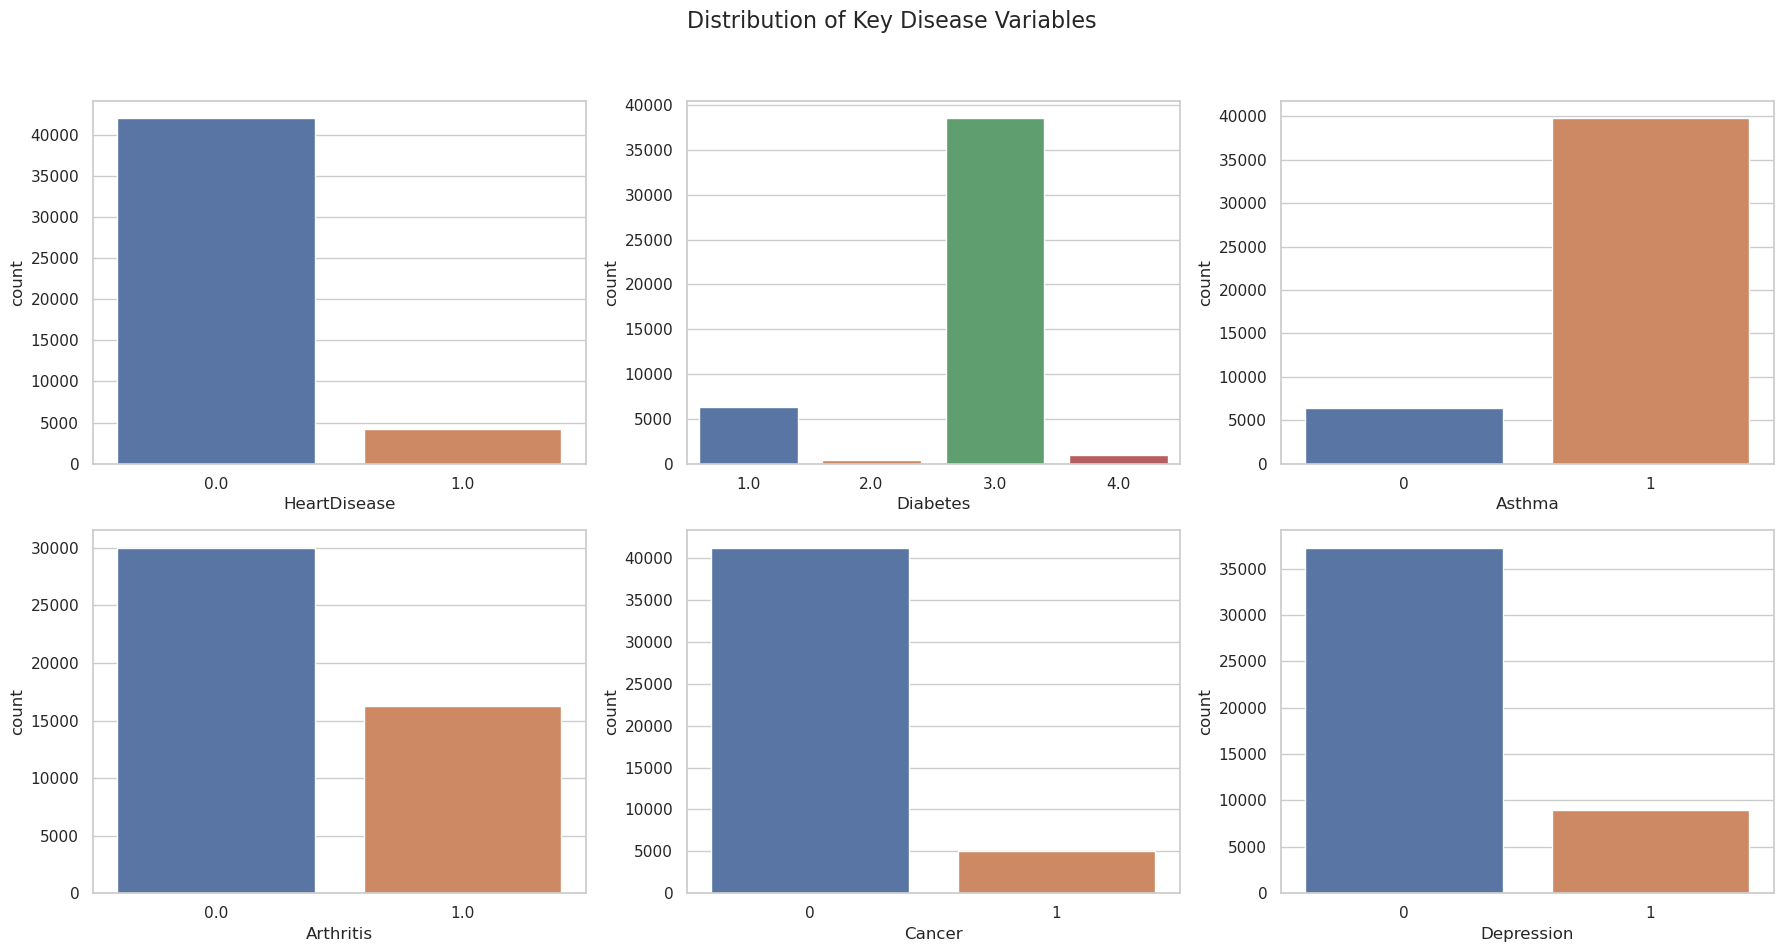

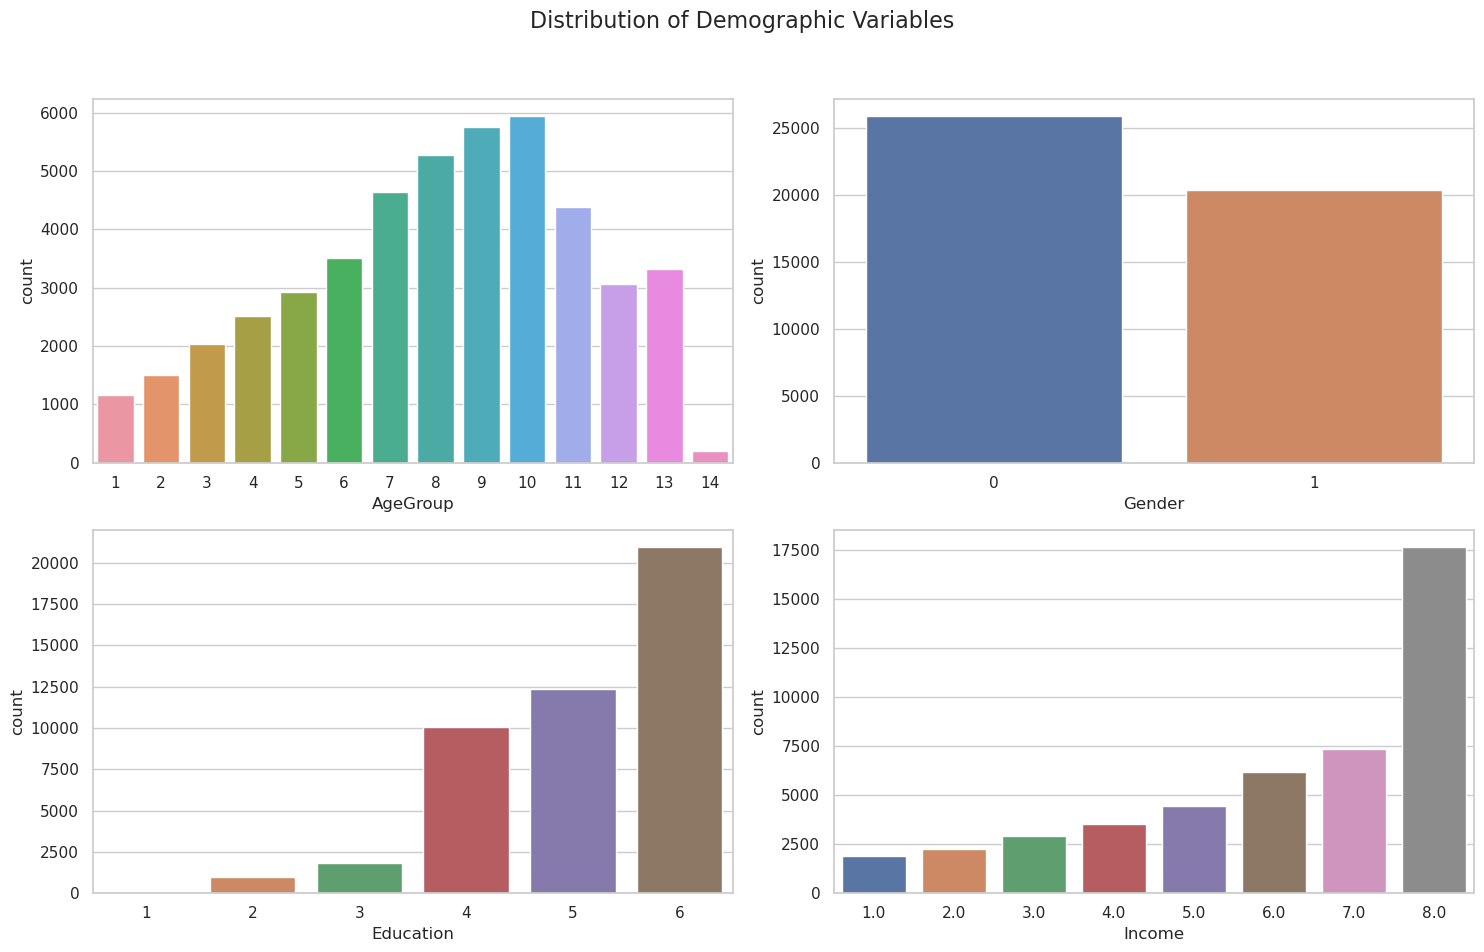

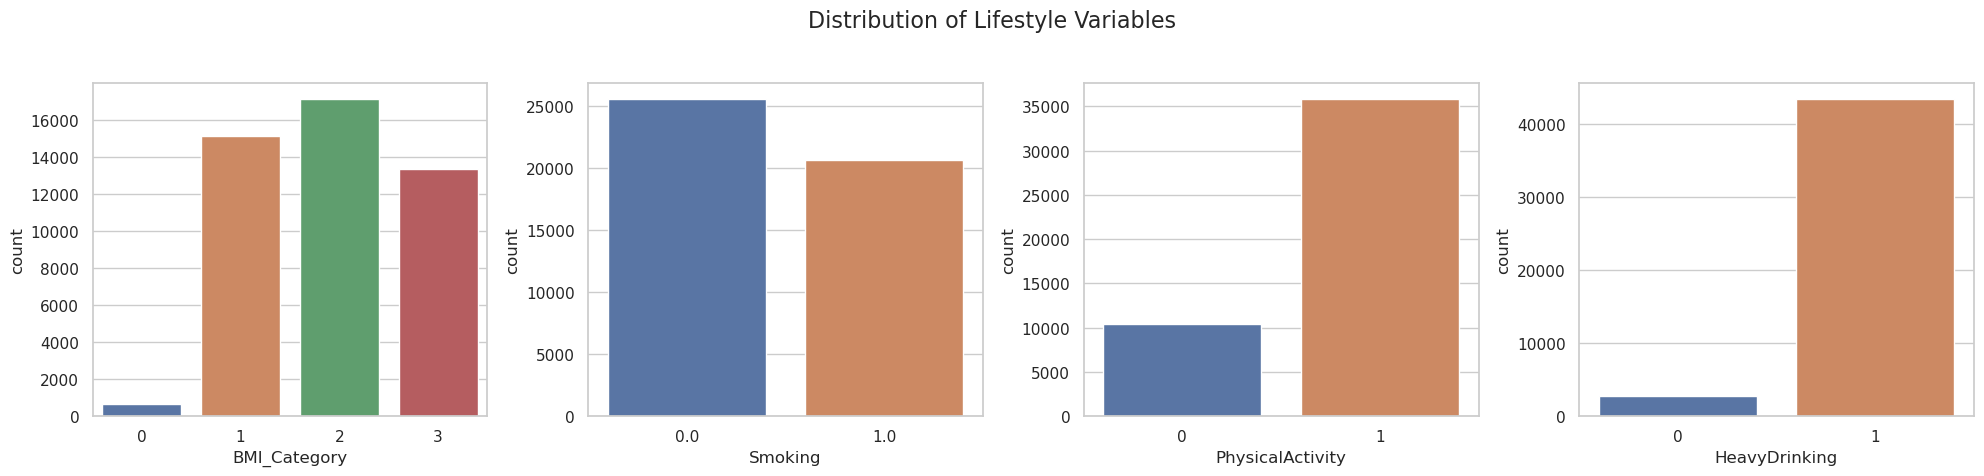

In [19]:
#Creating univariate plots to identify varibales, structured into different factors
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating a list of key variables for distribution plots
key_disease_variables = ['HeartDisease', 'Diabetes', 'Asthma', 'Arthritis', 'Cancer', 'Depression']
demographic_variables = ['AgeGroup', 'Gender', 'Education', 'Income']
lifestyle_variables = ['BMI_Category', 'Smoking', 'PhysicalActivity', 'HeavyDrinking']

# Plotting the distribution of key disease variables
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
for i, var in enumerate(key_disease_variables):
    sns.countplot(x=var, data=brfss_data_renamed, ax=axes[i//3, i%3])

fig.suptitle('Distribution of Key Disease Variables', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Plotting the distribution of demographic variables
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i, var in enumerate(demographic_variables):
    sns.countplot(x=var, data=brfss_data_renamed, ax=axes[i//2, i%2])

fig.suptitle('Distribution of Demographic Variables', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Plotting the distribution of lifestyle variables
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for i, var in enumerate(lifestyle_variables):
    if var == 'BMI_Category':
        sns.countplot(x=var, data=brfss_data_renamed, ax=axes[i])
    else:
        sns.countplot(x=var, data=brfss_data_renamed, ax=axes[i])

fig.suptitle('Distribution of Lifestyle Variables', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


Distribution of Depression: This graph illustrates the prevalence of reported depression within the dataset. It can show whether a small or large proportion of the respondents reported experiencing depression.

Distribution of BMI: The histogram for BMI displays the range and frequency of BMI values among the participants. This can give us an idea of the overall health in terms of weight management within the population.

Distribution of Age Groups: This chart shows how different age groups are represented in the dataset. Age can be a significant factor in both physical and mental health studies.

Distribution of Gender: The gender distribution helps us understand the gender representation in the dataset, which is important for identifying any gender-specific trends or patterns in depression.

### Bivariate Analysis

I set to understand the relationship between different factors with Depression Prevalence. 
The following are the factors: 
1. Demographic
2. Socio - Economic
3. Health
4. Lifestyle
5. States

category


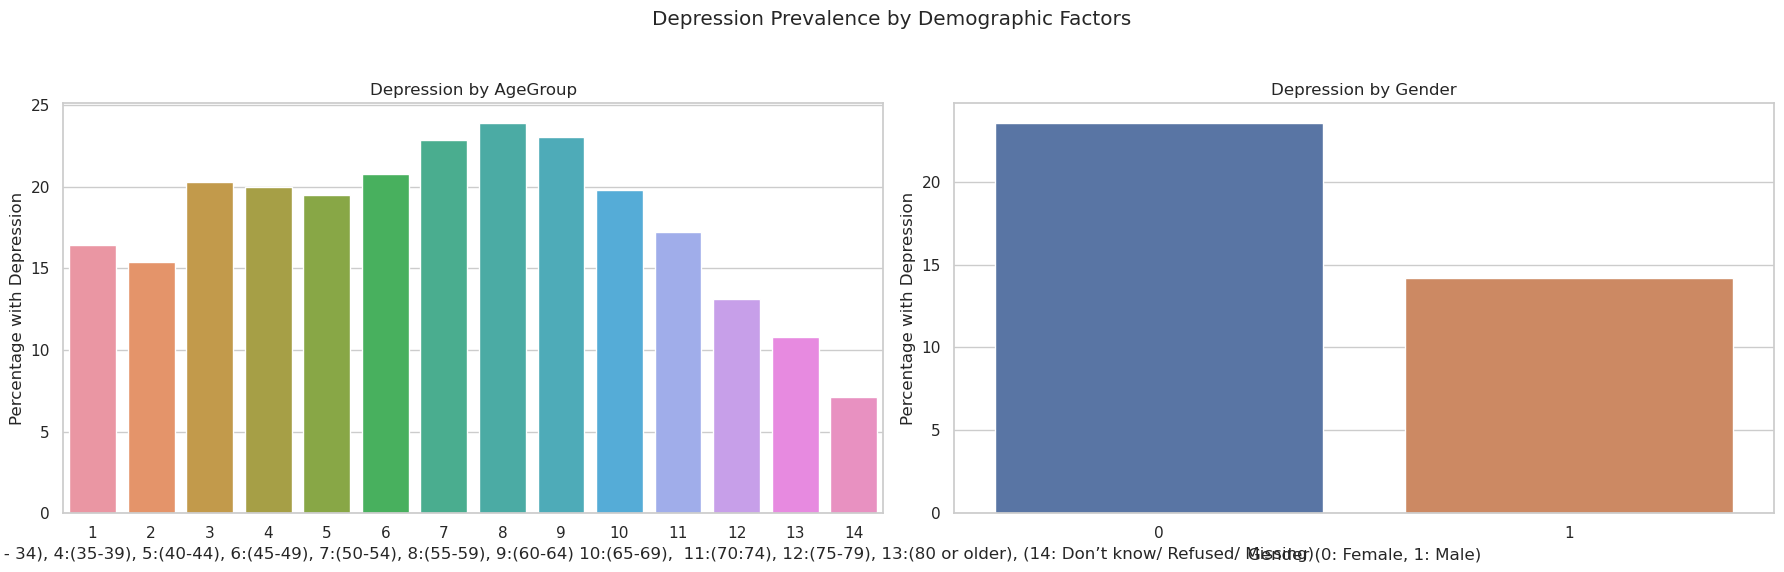

In [20]:
#Demographic Factors
Demographics = ['AgeGroup', 'Gender']
print(brfss_data_renamed['Depression'].dtype)

if brfss_data_renamed['Depression'].dtype != 'int64' and brfss_data_renamed['Depression'].dtype != 'float64':
    brfss_data_renamed['Depression'] = brfss_data_renamed['Depression'].astype(int)  # or .astype(float) depending on the context

fig, axes = plt.subplots(1, len(Demographics), figsize=(18, 6))
fig.suptitle('Depression Prevalence by Demographic Factors')

for i, factor in enumerate(Demographics):
    # Calculating the depression rate for each category within the factor
    depression_rate = brfss_data_renamed.groupby(factor)['Depression'].mean() * 100
    sns.barplot(ax=axes[i], x=depression_rate.index, y=depression_rate.values)
    axes[i].set_title(f'Depression by {factor}')
    #axes[i].set_xlabel(f'{factor} Category')
    axes[i].set_ylabel('Percentage with Depression')
    
axes[1].set_xlabel('Gender (0: Female, 1: Male)')
axes[0].set_xlabel('Age group: 1:(Age 18 -24), 2:(25 -29), 3:(30 - 34), 4:(35-39), 5:(40-44), 6:(45-49), 7:(50-54), 8:(55-59), 9:(60-64) 10:(65-69),  11:(70:74), 12:(75-79), 13:(80 or older), (14: Don’t know/ Refused/ Missing)')
# Adjusting the layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



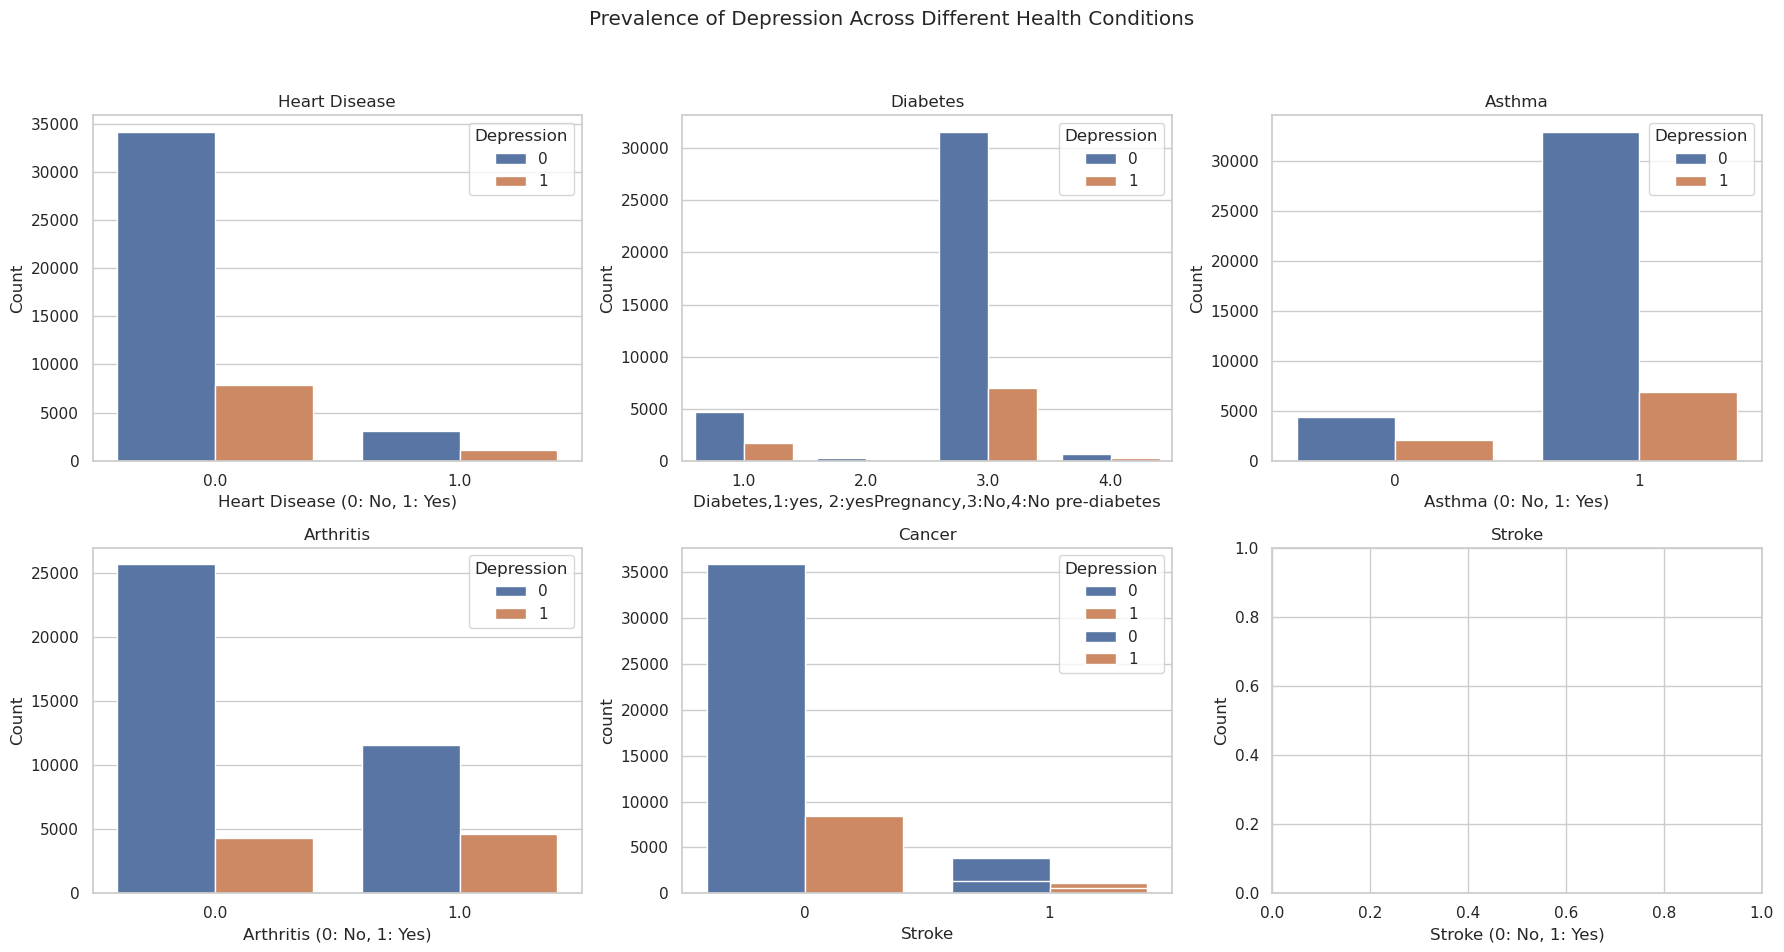

In [21]:
#  health condition 
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Prevalence of Depression Across Different Health Conditions')

data= brfss_data_renamed
# Heart Disease
sns.countplot(ax=axes[0, 0], x='HeartDisease', hue='Depression', data=brfss_data_renamed)
axes[0, 0].set_title('Heart Disease')
axes[0, 0].set_xlabel('Heart Disease (0: No, 1: Yes)')
axes[0, 0].set_ylabel('Count')

# Diabetes
sns.countplot(ax=axes[0, 1], x='Diabetes', hue='Depression', data=brfss_data_renamed)
axes[0, 1].set_title('Diabetes')
axes[0, 1].set_xlabel('Diabetes,1:yes, 2:yesPregnancy,3:No,4:No pre-diabetes')
axes[0, 1].set_ylabel('Count')
   #If respondent says pre-diabetes or borderline diabetes, use response code 4.   1 Yes   2 Yes, but female told only during pregnancy   3 No   4 No, pre-diabetes or borderline diabetes   7
# Asthma
sns.countplot(ax=axes[0, 2], x='Asthma', hue='Depression', data=brfss_data_renamed)
axes[0, 2].set_title('Asthma')
axes[0, 2].set_xlabel('Asthma (0: No, 1: Yes)')
axes[0, 2].set_ylabel('Count')

# Arthritis
sns.countplot(ax=axes[1, 0], x='Arthritis', hue='Depression', data=brfss_data_renamed)
axes[1, 0].set_title('Arthritis')
axes[1, 0].set_xlabel('Arthritis (0: No, 1: Yes)')
axes[1, 0].set_ylabel('Count')

# Cancer
sns.countplot(ax=axes[1, 1], x='Cancer', hue='Depression', data=brfss_data_renamed)
axes[1, 1].set_title('Cancer')
axes[1, 1].set_xlabel('Cancer (0: No, 1: Yes)')
axes[1, 1].set_ylabel('Count')

# Stroke
sns.countplot(ax=axes[1, 1], x='Stroke', hue='Depression', data=brfss_data_renamed)
axes[1, 2].set_title('Stroke')
axes[1, 2].set_xlabel('Stroke (0: No, 1: Yes)')
axes[1, 2].set_ylabel('Count')

# Adjusting the layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


int64


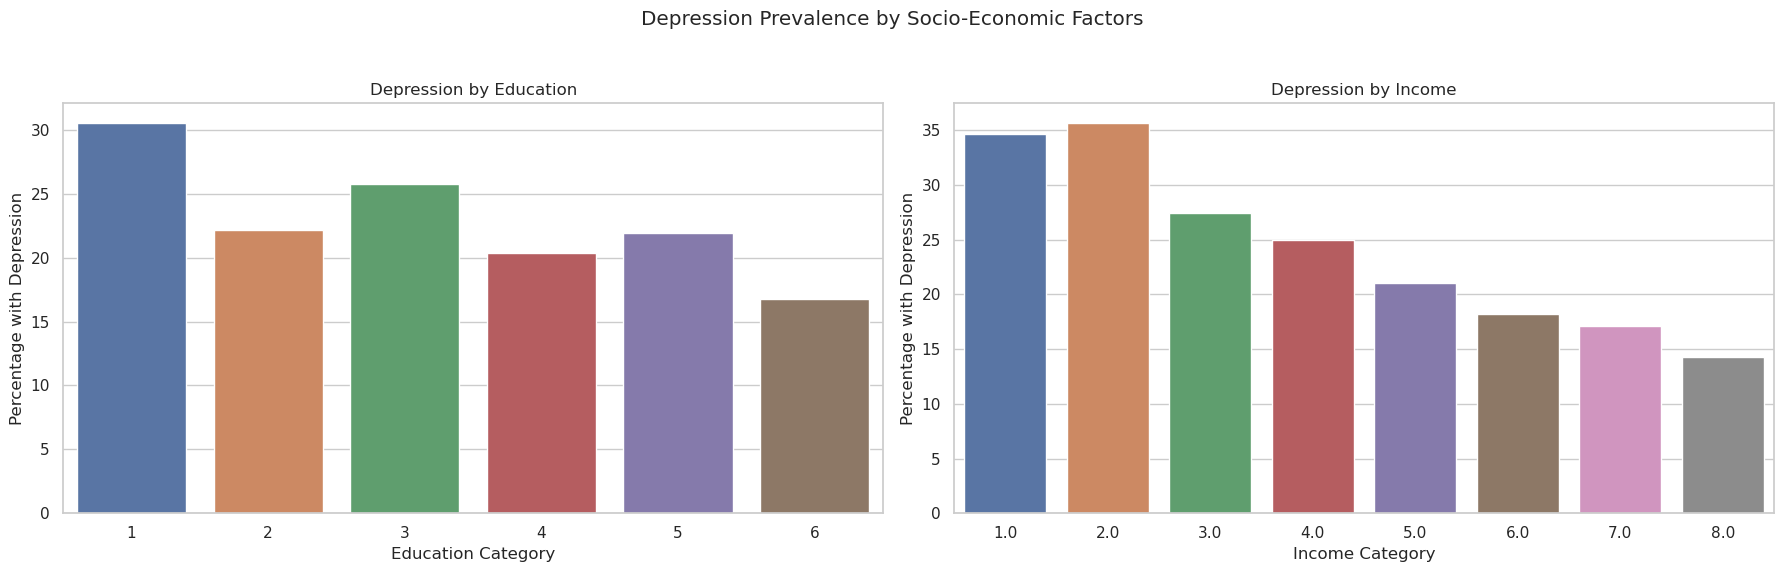

In [22]:
#Socio Economic Factor
socio_economic_factors_available = ['Education', 'Income']
print(brfss_data_renamed['Depression'].dtype)

if brfss_data_renamed['Depression'].dtype != 'int64' and brfss_data_renamed['Depression'].dtype != 'float64':
    brfss_data_renamed['Depression'] = brfss_data_renamed['Depression'].astype(int)  # or .astype(float) depending on the context

fig, axes = plt.subplots(1, len(socio_economic_factors_available), figsize=(18, 6))
fig.suptitle('Depression Prevalence by Socio-Economic Factors')

for i, factor in enumerate(socio_economic_factors_available):
    # Calculating the depression rate for each category within the factor
    depression_rate = brfss_data_renamed.groupby(factor)['Depression'].mean() * 100
    sns.barplot(ax=axes[i], x=depression_rate.index, y=depression_rate.values)
    axes[i].set_title(f'Depression by {factor}')
    axes[i].set_xlabel(f'{factor} Category')
    axes[i].set_ylabel('Percentage with Depression')

# Adjusting the layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


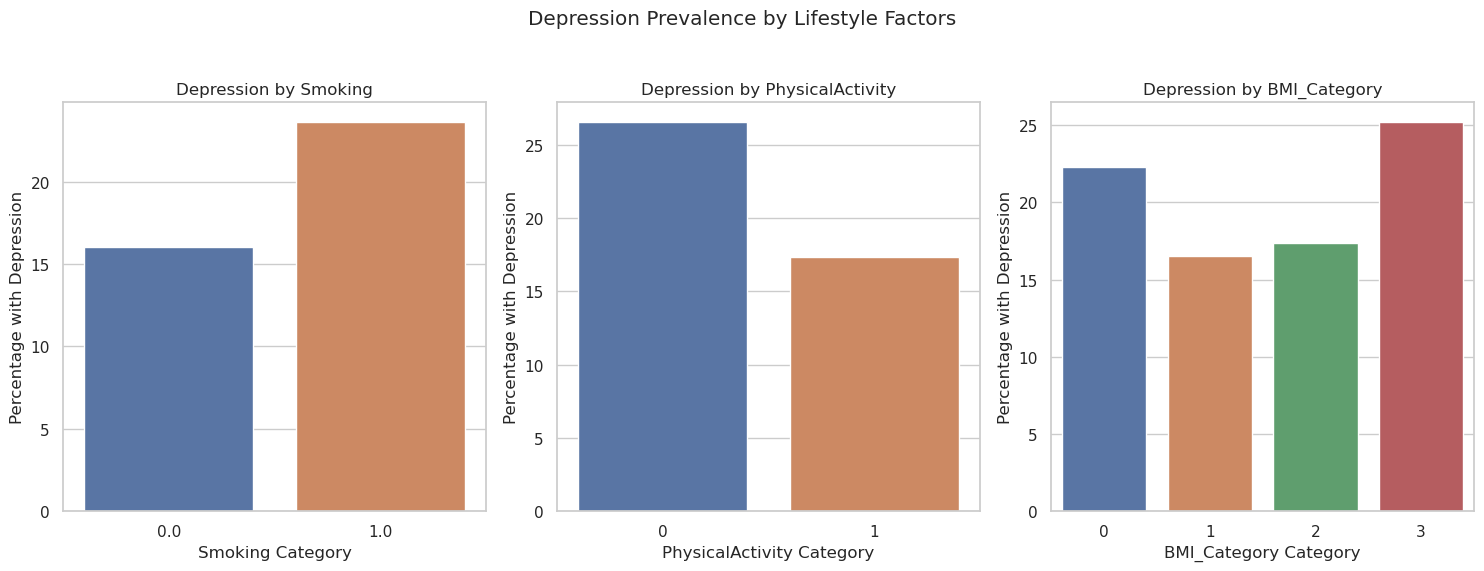

In [23]:
# Lifestyle Factors
lifestyle_factors = ['BMI_Category', 'PhysicalActivity', 'Smoking', 'AlcoholConsumption', 'SleepPattern']
available_lifestyle_factors = brfss_data_renamed.columns.intersection(lifestyle_factors)

# Creating individual subplots for each available lifestyle factor
num_factors = len(available_lifestyle_factors)
fig, axes = plt.subplots(1, num_factors, figsize=(5 * num_factors, 6))
fig.suptitle('Depression Prevalence by Lifestyle Factors')

# In case there's only one lifestyle factor, ensure axes is iterable
if num_factors == 1:
    axes = [axes]

for i, factor in enumerate(available_lifestyle_factors):
    # Calculating the depression rate for each category within the factor
    depression_rate = brfss_data_renamed.groupby(factor)['Depression'].mean() * 100
    sns.barplot(ax=axes[i], x=depression_rate.index, y=depression_rate.values)
    axes[i].set_title(f'Depression by {factor}')
    axes[i].set_xlabel(f'{factor} Category')
    axes[i].set_ylabel('Percentage with Depression')

# Adjusting the layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


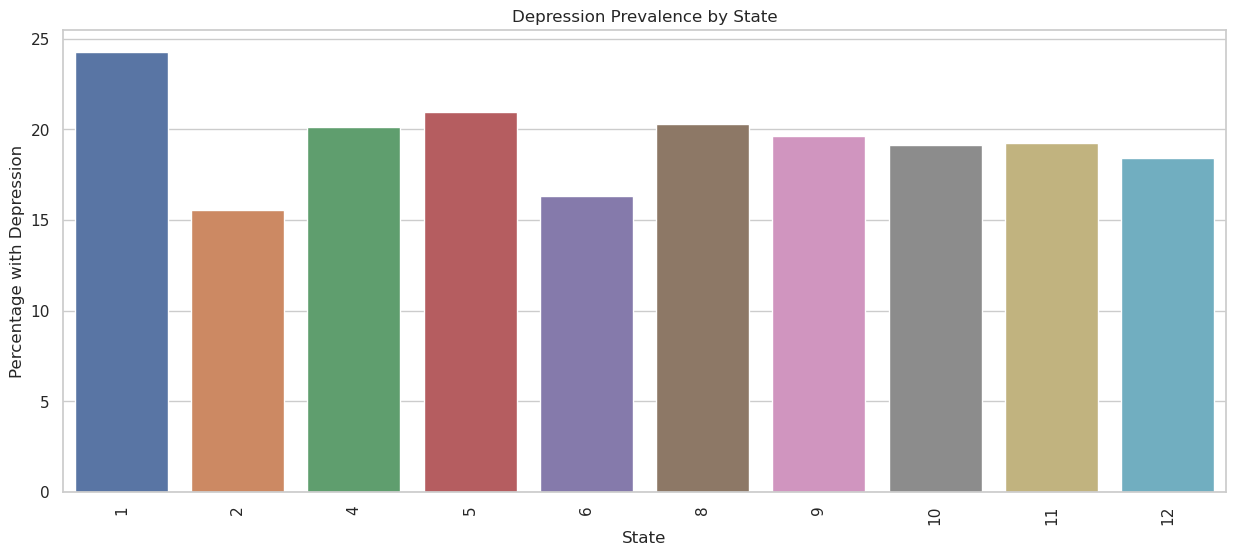

State
1     24.279379
5     20.978782
8     20.308992
4     20.118749
9     19.638826
11    19.224211
10    19.155420
12    18.441998
6     16.345878
2     15.544730
Name: Depression, dtype: float64

In [24]:
#States
statewise_depression_rate = brfss_data_renamed.groupby('State')['Depression'].mean() * 100

# Plotting the depression prevalence by state
plt.figure(figsize=(15, 6))
sns.barplot(x=statewise_depression_rate.index, y=statewise_depression_rate.values)
plt.title('Depression Prevalence by State')
plt.xlabel('State')
plt.ylabel('Percentage with Depression')
plt.xticks(rotation=90)  # Rotating the x-axis labels for better readability
plt.show()

statewise_depression_rate.sort_values(ascending=False)  # Displaying the rates in descending order for clarity


In [25]:
#Correlation Analysis
#For binary categorical variables, I used point-biserial correlation. 
#For non-binary categorical variables, I used Cramér's V.

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return (phi2corr / min((kcorr-1), (rcorr-1)))**0.5

# Label encoding the 'Depression' column
le = LabelEncoder()
brfss_data_renamed['Depression_encoded'] = le.fit_transform(brfss_data_renamed['Depression'])

# Calculating correlations
correlations = {}
for column in brfss_data_renamed.columns:
    if column == 'Depression_encoded':
        continue
    if brfss_data_renamed[column].dtype.name == 'category':
        corr = cramers_v(brfss_data_renamed[column], brfss_data_renamed['Depression_encoded'])
    else:
        corr, _ = stats.pointbiserialr(brfss_data_renamed[column], brfss_data_renamed['Depression_encoded'])
    correlations[column] = corr

# Creating a DataFrame for the correlations
correlation_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation'])
correlation_df

,Correlation
State,0.054307
HeartDisease,0.059149
Diabetes,0.076499
Asthma,0.129898
Arthritis,0.170530
Cancer,0.033874
Depression,1.000000
HighBP,0.070627
HighCholesterol,0.099847
BMI,0.105679


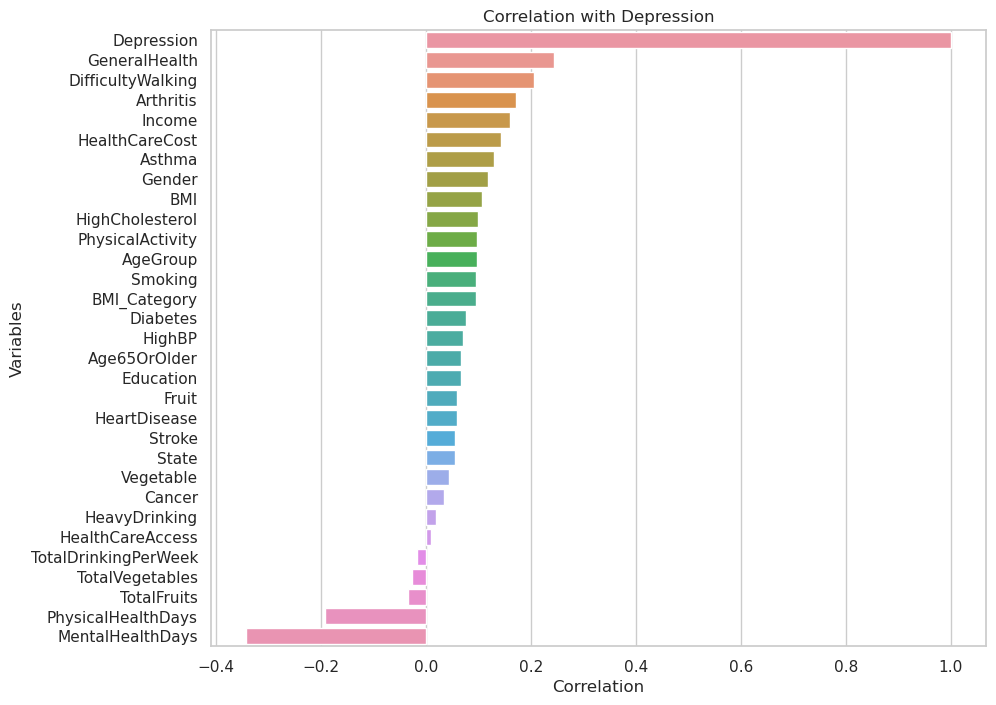

In [26]:
# Sorting the correlations for better visualization
correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)

# Creating a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=correlation_df['Correlation'], y=correlation_df.index)
plt.title('Correlation with Depression')
plt.xlabel('Correlation')
plt.ylabel('Variables')
plt.show()


## Statistical Analysis using Logistic model

This aimed to understand the significance of the relationship between each specific variable by analysing the coefficients and model metrics such as R squared

In [27]:
# Selecting predictor Variables
lifestyle_factors = ['State', 'HeartDisease', 'Diabetes', 'Asthma', 'Arthritis', 'Cancer',
        'HighBP', 'HighCholesterol', 'BMI', 'Smoking', 'Stroke',
       'PhysicalActivity', 'Fruit', 'TotalFruits', 'Vegetable',
       'TotalVegetables', 'HeavyDrinking', 'TotalDrinkingPerWeek',
       'DifficultyWalking', 'HealthCareAccess', 'HealthCareCost',
       'GeneralHealth', 'MentalHealthDays', 'PhysicalHealthDays', 'Gender',
       'AgeGroup', 'Age65OrOlder', 'Education', 'Income']


# Preparing the feature matrix (X) and target vector (y)
X_lifestyle = brfss_data_renamed[lifestyle_factors].copy()

y = data.loc[X_lifestyle.index, 'Depression']  # Ensuring target vector matches the feature matrix

# Add a constant to the predictor variable set to represent the intercept
X_lifestyle_const = sm.add_constant(X_lifestyle)

# Fitting the logistic regression model
lifestyle_logit_model = sm.Logit(y, X_lifestyle_const).fit()

# Get the summary of the logistic regression model
lifestyle_logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.397962
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Depression   No. Observations:                46240
Model:                          Logit   Df Residuals:                    46210
Method:                           MLE   Df Model:                           29
Date:                Sun, 10 Dec 2023   Pseudo R-squ.:                  0.1920
Time:                        18:15:25   Log-Likelihood:                -18402.
converged:                       True   LL-Null:                       -22774.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.3851      0.174     -2.212      0.027      -0.726      -0.044
State                    0.0047      0.004      1.192      0.233      -0.003       0.012
HeartDisease             0.0177      0.046      0.384      0.701      -0.073       0.108
Diabetes                 0.0186      0.019      0.998      0.318      -0.018       0.055
Asthma                  -0.3556      0.035    -10.293      0.000      -0.423      -0.288
Arthritis                0.4786      0.031     15.600      0.000       0.418       0.539
Cancer                   0.0995      0.042      2.369      0.018       0.017       0.182
HighBP                  -0.0083      0.031     -0.268      0.789      -0.069       0.052
HighCholesterol         -0.3469      0.029    -12.109      0.000      -0.403      -0.291
BMI                   9.475e-05   2.17e-05      4.365      0.000    5.22e-05       0.000
Smoking                  0.3898      0.027     14.177      0.000       0.336       0.444
Stroke                  -0.0196      0.061     -0.321      0.748      -0.139       0.100
PhysicalActivity        -0.0783      0.032     -2.447      0.014      -0.141      -0.016
Fruit                   -0.1017      0.034     -3.034      0.002      -0.167      -0.036
TotalFruits          -1.563e-05      0.000     -0.122      0.903      -0.000       0.000
Vegetable               -0.0541      0.037     -1.453      0.146      -0.127       0.019
TotalVegetables      -5.775e-05   8.35e-05     -0.691      0.489      -0.000       0.000
HeavyDrinking           -0.2857      0.072     -3.948      0.000      -0.428      -0.144
TotalDrinkingPerWeek -5.202e-05   2.75e-05     -1.892      0.059      -0.000    1.88e-06
DifficultyWalking        0.2850      0.038      7.551      0.000       0.211       0.359
HealthCareAccess         0.2263      0.061      3.734      0.000       0.107       0.345
HealthCareCost           0.3610      0.042      8.642      0.000       0.279       0.443
GeneralHealth            0.2193      0.015     14.172      0.000       0.189       0.250
MentalHealthDays        -0.0183      0.000    -52.567      0.000      -0.019      -0.018
PhysicalHealthDays      -0.0029      0.000     -7.809      0.000      -0.004      -0.002
Gender                  -0.4412      0.029    -15.124      0.000      -0.498      -0.384
AgeGroup                -0.0207      0.007     -2.877      0.004      -0.035      -0.007
Age65OrOlder            -0.3818      0.043     -8.914      0.000      -0.466      -0.298
Education                0.1373      0.015      9.061      0.000       0.108       0.167
Income                  -0.0730      0.007    -10.102      0.000      -0.087      -0.059
========================================================================================
"""

## Predictive  Model Building

Variables with non-significant p-values (e.g., State, TotalVegetables, TotalDrinkingPerWeek) were  considered for exclusion from the model to avoid overfitting and enhance model interpretability.

The rationale behind choosing these variables includes their statistical significance, the robustness of their relationship with depression (as indicated by p-values), and the practical implications of their effect sizes (coefficients). 

Confusion Matrix:
[[10693   444]
 [ 2011   724]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90     11137
           1       0.62      0.26      0.37      2735

    accuracy                           0.82     13872
   macro avg       0.73      0.61      0.63     13872
weighted avg       0.80      0.82      0.79     13872

AUC: 0.8014983078458271


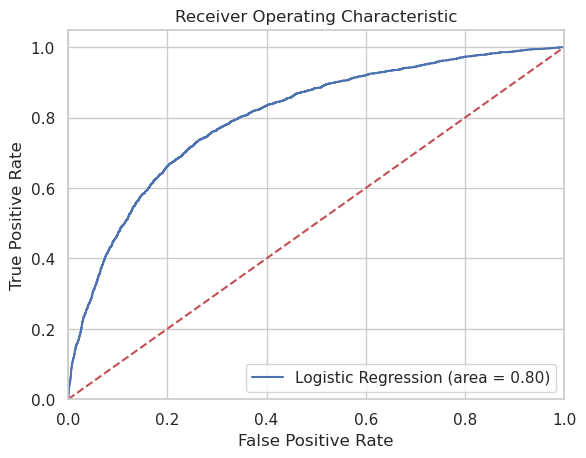

In [28]:
# Exclude columns that are not predictors like 'State', 'AgeGroup', etc.
predictor_columns = [col for col in brfss_data_renamed.columns if col not in ['Depression', 'State', 'Depression_encoded', "TotalVegetables", "TotalDrinkingPerWeek" ]]


# Creating the features matrix (X) and the target vector (y)
X = brfss_data_renamed[predictor_columns]
y = brfss_data_renamed['Depression']

# Standardizing the predictor variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Creating and training the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

# Evaluating the model using confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output the results
print('Confusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)

# If you want to analyze the ROC curve and AUC
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC: {auc}')

# Plotting ROC Curve
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


The logistic regression model demonstrated a strong ability to differentiate between the presence and absence of depression, with an overall accuracy of 82% and an AUC of 0.80, suggesting good predictive performance. However, it was more reliable in identifying individuals without depression (non-depression precision of 84%, recall of 96%, and F1-score of 90%) than in detecting those with the condition (depression precision of 61%, recall of 26%, and F1-score of 37%). This imbalance led to a high number of false negatives in predicting depression. To address this, I implemented the Synthetic Minority Over-sampling Technique (SMOTE), which improved the model's ability to identify true positives for depression, trading off slightly in overall accuracy but enhancing the clinical applicability of the model. 

Confusion Matrix:
[[11137     0]
 [    0  2735]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11137
           1       1.00      1.00      1.00      2735

    accuracy                           1.00     13872
   macro avg       1.00      1.00      1.00     13872
weighted avg       1.00      1.00      1.00     13872

AUC: 1.0


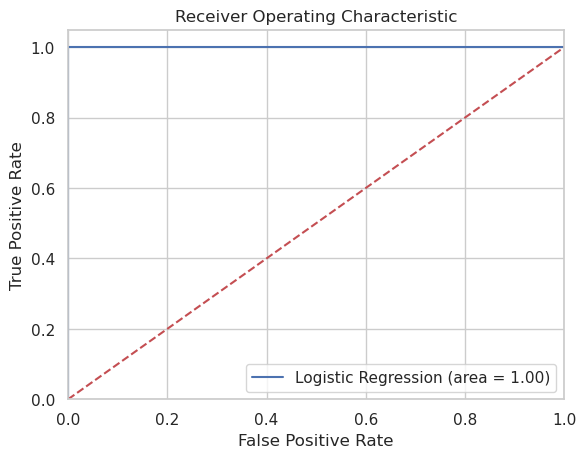

In [29]:
# Preparing the feature matrix and target vector
X1 = brfss_data_renamed.drop(['Depression', 'State', "TotalVegetables", "TotalDrinkingPerWeek"  ], axis=1)  # drop non-predictor columns
y1 = brfss_data_renamed['Depression']

# Handling categorical variables with one-hot encoding if necessary

# Handling missing values if necessary

# Standardizing the predictor variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y1, test_size=0.3, random_state=42)

# Creating and training the logistic regression model with class weights
logistic_model = LogisticRegression(class_weight='balanced', random_state=42)
logistic_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

# Evaluating the model using confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC: {auc}')

# Plotting ROC Curve
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


## Further Statistical Tests on Factors: Model Approach

## Demographics Analyis

In [30]:
# Selecting the lifestyle-related predictor variables by their renamed names
lifestyle_factors = [
    'Gender','AgeGroup'
]

# Preparing the feature matrix (X) and target vector (y)
X_lifestyle = brfss_data_renamed[lifestyle_factors].copy()

y = data.loc[X_lifestyle.index, 'Depression']  # Ensure target vector matches the feature matrix

# Add a constant to the predictor variable set to represent the intercept
X_lifestyle_const = sm.add_constant(X_lifestyle)

# Fit the logistic regression model
lifestyle_logit_model = sm.Logit(y, X_lifestyle_const).fit()

# Get the summary of the logistic regression model
print(lifestyle_logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.484605
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Depression   No. Observations:                46240
Model:                          Logit   Df Residuals:                    46237
Method:                           MLE   Df Model:                            2
Date:                Sun, 10 Dec 2023   Pseudo R-squ.:                 0.01605
Time:                        18:15:27   Log-Likelihood:                -22408.
converged:                       True   LL-Null:                       -22774.
Covariance Type:            nonrobust   LLR p-value:                1.927e-159
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9058      0.033    -27.215      0.000      -0.971      -0.841
Gender        -0.6283      0.

The logistic regression analysis of demographic factors—gender and age group—on a dataset of 46,240 individuals reveals significant insights into their relationship with depression. The model, achieving a pseudo R-squared value of 0.01605, indicates a modest but notable influence of these factors on depression prevalence. The constant term of -0.9058 sets a baseline for the log odds of depression, and the highly significant coefficients for gender (-0.6283) and age group (-0.0337) suggest distinct patterns in the likelihood of reporting depression. The negative coefficient for gender, implies that males are less likely to report depression compared to the baseline gender category, likely females. 

 ## Lifestyle Factors Analysis

In [31]:
# Selecting the lifestyle-related predictor variables by their renamed names
lifestyle_factors = [
    'BMI_Category', 'Smoking', 'PhysicalActivity', 
    'Fruit', 'TotalFruits', 'Vegetable', 'TotalVegetables', 
    'HeavyDrinking', 'TotalDrinkingPerWeek'
]

# Preparing the feature matrix (X) and target vector (y)
X_lifestyle = brfss_data_renamed[lifestyle_factors].copy()

# Handling categorical variables with one-hot encoding if necessary
# X_lifestyle = pd.get_dummies(X_lifestyle, drop_first=True)

# Handling missing values
X_lifestyle.dropna(inplace=True)
y = data.loc[X_lifestyle.index, 'Depression']  # Ensure target vector matches the feature matrix

# Add a constant to the predictor variable set to represent the intercept
X_lifestyle_const = sm.add_constant(X_lifestyle)

# Fit the logistic regression model
lifestyle_logit_model = sm.Logit(y, X_lifestyle_const).fit()

# Get the summary of the logistic regression model
print(lifestyle_logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.479871
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Depression   No. Observations:                46240
Model:                          Logit   Df Residuals:                    46230
Method:                           MLE   Df Model:                            9
Date:                Sun, 10 Dec 2023   Pseudo R-squ.:                 0.02566
Time:                        18:15:27   Log-Likelihood:                -22189.
converged:                       True   LL-Null:                       -22774.
Covariance Type:            nonrobust   LLR p-value:                6.937e-246
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.8218      0.086     -9.501      0.000      -0.991      -0.652

The model achieves a pseudo R-squared value of 0.02566, indicating it captures a modest proportion of the variance in depression outcomes, and it significantly improves upon the null model, as evidenced by the LLR p-value of 6.937e-246.

Key findings from the model include:

BMI and Smoking: Both BMI  and smoking status) are positively associated with depression, indicating that higher BMI and being a smoker are linked to increased odds of depression. 

Physical Activity: The negative coefficient for physical activity  suggests that higher levels of activity are associated with lower odds of depression.

Dietary Factors: Interestingly, while fruit intake shows a significant negative association with depression, indicating potential mental health benefits, the coefficients for total fruits and total vegetables are not statistically significant. This suggests a more complex relationship between diet and mental health that might not be captured by quantity alone.

Alcohol Consumption: The negative coefficients for heavy drinking (coef = -0.6801) and total drinking per week (coef = -0.0003) are somewhat counterintuitive, as they suggest a lower likelihood of depression with higher alcohol consumption. This could reflect underlying complexities in how alcohol use interacts with mental health or might be influenced by self-reporting biases.

## Social Economical Factors

In [32]:
X_socioeconomic = brfss_data_renamed[['Education', 'Income']].copy()

# Handling missing values
X_socioeconomic.dropna(inplace=True)
y = data.loc[X_socioeconomic.index, 'Depression']  # Ensure target vector matches the feature matrix

# Add a constant to the predictor variable set to represent the intercept
X_socioeconomic_const = sm.add_constant(X_socioeconomic)

# Fit the logistic regression model
socioeconomic_logit_model = sm.Logit(y, X_socioeconomic_const).fit()

# Get the summary of the logistic regression model
print(socioeconomic_logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.480596
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Depression   No. Observations:                46240
Model:                          Logit   Df Residuals:                    46237
Method:                           MLE   Df Model:                            2
Date:                Sun, 10 Dec 2023   Pseudo R-squ.:                 0.02419
Time:                        18:15:28   Log-Likelihood:                -22223.
converged:                       True   LL-Null:                       -22774.
Covariance Type:            nonrobust   LLR p-value:                6.075e-240
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6418      0.059    -10.938      0.000      -0.757      -0.527
Education      0.0639      0.

Coefficients (coef):

Each coefficient represents the log odds of the event (depression) occurring for a one-unit change in the predictor, holding other predictors constant.
A positive coefficient indicates that as the predictor increases, the odds of depression occurring increase.
Conversely, a negative coefficient suggests that as the predictor increases, the odds of depression decrease.
Odds Ratio:

To make this more intuitive, you can convert coefficients into odds ratios by exponentiating them. An odds ratio greater than 1 indicates higher odds of depression as the predictor increases, while an odds ratio less than 1 indicates lower odds.
For example, if a coefficient is 0.1390, the odds ratio is exp(0.1390). If the coefficient is -0.3585, the odds ratio is exp(-0.3585).
Significance (P>|z|):

The p-values indicate whether the effects of the predictors are statistically significant. A p-value less than 0.05 is typically considered significant.
If a predictor has a p-value greater than 0.05, it may not be a reliable indicator of the presence of depression.
Intercept (const):

The intercept represents the log odds of the occurrence of depression when all predictors are at zero. In many cases, this may not have a practical interpretation, especially if zero is not a meaningful value for some predictors.
Application:

In practice, you would use the model to predict the log odds of depression for given values of the predictors. This can be converted to a probability, which is more intuitive. The probability ranges from 0 to 1, where values closer to 1 indicate a higher likelihood of depression.


Model Fit and Performance

Log-Likelihood: -18335, which is an indicator of the model's fit to the data.
Pseudo R-squared: 0.02419, suggesting that about 2.42% of the variance in depression is explained by the model.
Convergence: Achieved after 6 iterations, indicating that the model optimization was successful.
Coefficient Analysis

Income (Coefficient: -0.1886): Indicates a negative association between income and depression. As income increases, the likelihood of depression decreases.
Education (Coefficient: 0.0639): Suggests a positive association with depression. Higher levels of education are associated with a slightly increased likelihood of depression.
Statistical Significance

Both income and education show statistical significance with their p-values being less than 0.05. This affirms the association of these socio-economic factors with depression.
Confidence Intervals

The 95% confidence intervals for both coefficients do not include zero, further reinforcing the significance of these factors.

## Health Factor Analysis

In [33]:
# Replace these example health factor names with the actual health factor names from your dataset
health_factors = [
    'HeartDisease', 'Diabetes', 'Asthma', 'HighBP', 
    'HighCholesterol', 'Cancer', 'Stroke', 'Arthritis', 
    # Add any other health factors that are present in your dataset
]


X_health = brfss_data_renamed[health_factors].copy()
y = data.loc[X_health.index, 'Depression']  # Ensure I have the corresponding target values
# Add a constant to the predictor variable set to represent the intercept
X_health_const = sm.add_constant(X_health)

# Fit the logistic regression model
health_logit_model = sm.Logit(y, X_health_const).fit()

# Get the summary of the logistic regression model
print(health_logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.469642
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Depression   No. Observations:                46240
Model:                          Logit   Df Residuals:                    46231
Method:                           MLE   Df Model:                            8
Date:                Sun, 10 Dec 2023   Pseudo R-squ.:                 0.04643
Time:                        18:15:28   Log-Likelihood:                -21716.
converged:                       True   LL-Null:                       -22774.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.7908      0.055    -14.436      0.000      -0.898      -0.683
HeartDisease  

With a pseudo R-squared value of 0.04643, the model suggests a moderate influence of these health variables on the likelihood of depression, indicating a more substantial impact than seen with demographic and lifestyle factors.

The analysis yields the following insights:

Heart Disease, Diabetes, and High Blood Pressure: The model shows mixed results for these conditions. Heart disease has a positive but borderline significant coefficient (coef = 0.0778, p = 0.054), suggesting a slight increase in the likelihood of depression. Diabetes and high blood pressure have negative coefficients (coef = -0.0666 and -0.0164, respectively), with diabetes showing a significant association. 

Asthma, High Cholesterol, and Arthritis: Asthma and high cholesterol both have significant negative coefficients (coef = -0.7053 and -0.3266), indicating a decrease in the odds of depression among those with these conditions. Conversely, arthritis shows a strong positive association (coef = 0.7162, p < 0.000), indicating a substantially higher likelihood of depression among individuals with arthritis.

Cancer and Stroke: The coefficients for cancer and stroke are 0.0688 and 0.2450, respectively. Stroke's association with an increased likelihood of depression is statistically significant (p < 0.000), while cancer's association is marginally significant (p = 0.063).

### Depression By States

In [34]:
X_State = brfss_data_renamed[ 'State'].copy()
y = data.loc[X_socioeconomic.index, 'Depression']  # Ensure target vector matches the feature matrix

# Add a constant to the predictor variable set to represent the intercept
X_State_const = sm.add_constant(X_State)

# Fit the logistic regression model
socioeconomic_logit_model = sm.Logit(y, X_State_const).fit()

# Get the summary of the logistic regression model
print(socioeconomic_logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.492355
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             Depression   No. Observations:                46240
Model:                          Logit   Df Residuals:                    46238
Method:                           MLE   Df Model:                            1
Date:                Sun, 10 Dec 2023   Pseudo R-squ.:               0.0003111
Time:                        18:15:28   Log-Likelihood:                -22766.
converged:                       True   LL-Null:                       -22774.
Covariance Type:            nonrobust   LLR p-value:                 0.0001669
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3292      0.027    -49.053      0.000      -1.382      -1.276
State         -0.0132      0.

The model's pseudo R-squared value is 0.0003111, which is very low, indicating that the 'State' variable, in isolation, explains a minimal portion of the variance in depression outcomes. Despite the small effect size, the model is statistically significant, as evidenced by the LLR p-value of 0.0001669, suggesting that there are slight but measurable differences in depression prevalence across states.

Key insights from the model are as follows:

Coefficient for State: The coefficient for the 'State' variable is -0.0132, with a statistically significant p-value (p < 0.000). This suggests that there is a small variation in the likelihood of reporting depression across different states. The negative sign of the coefficient implies a slight decrease in the odds of depression as the state code increases, though the practical significance of this finding is limited given the small effect size.

Constant (Intercept): The intercept of -1.3292 sets the baseline log odds of depression for the reference state (the state omitted from the dummy variable coding).



In [35]:
#code for Kruskal-Wallis test
# Assuming 'Depression' is your target variable and 'State' is the categorical variable

# Grouping data by state
grouped_data = brfss_data_renamed.groupby('State')['Depression']

# Performing the Kruskal-Wallis Test
stat, p_value = stats.kruskal(*[group for name, group in grouped_data])
print(f"Kruskal-Wallis Test Statistic: {stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference in depression prevalence among states.")
else:
    print("There is no statistically significant difference in depression prevalence among states.")


Kruskal-Wallis Test Statistic: 145.3697881161948, P-value: 8.014686737694127e-27
There is a statistically significant difference in depression prevalence among states.
